# Rice coding

We investigate the optimization of the Rice coding parameter $m$ for a series whose histogram follows a Gaussian function.

Suppose that the histogram is expressed, for an integer value $x_i$, as
\begin{equation}
\label{e1}
 y_i = \frac{1}{\sqrt{2\pi}\sigma} \exp{\left(-\frac{x_i^2}{2\sigma^{2}}\right)},
\end{equation}
where $\sigma$ is the deviation of the Gaussian. We assume that the Gaussian is normalized and the center is 0. $x_i$ takes both positive and negative values,

Rice coding is applicable to 0 or positive integers. We define X_i as follows.
\begin{equation}
\label{e2}
  X_i=
  \begin{cases}
     2x_i ~(x_i \ge 0)\\
     2(-x_i -1) + 1 ~(x_i < 0)
  \end{cases}
\end{equation}

In case of $\sigma \gg 1$, we can approximate the equation (1) as continuous. Also,  the substitution in equation (2) is equivalent to replacing $\sigma$ with $2\sigma$ and limiting the range from $[-\infty,\infty]$ to $[0,\infty]$. We thus consider
\begin{equation}
\label{e3}
 y(X; \sigma) = \frac{1}{\sqrt{8\pi}\sigma} \exp{\left(-\frac{X^2}{8\sigma^{2}}\right)},
\end{equation}

Now, the Rice coding encode a number $X$ with the following numbers of bits $b(X, M)$ for a parameter $M=2^m$, where $m$ is a positive integer.
\begin{equation}
\label{e4}
  b(X, m)=
  \begin{cases}
     m+1 ~(0 \le X < M)\\
     m+2 ~(M \le X < 2M)\\
     ... \\
     m+n ~((n-1)M \le X < nM)\\
     ...
  \end{cases}
\end{equation}

The average eoncided bit is given by
\begin{equation}
\langle b(m, \sigma) \rangle = \int_0^{\infty}dX b(X,m) Y(X; \sigma) 
= \sum_{n=1}^{\infty} (m+n) \frac{1}{\sqrt{\pi}} \int_{\frac{(n-1)M}{\sqrt{8}\sigma}}^{\frac{nM}{\sqrt{8}\sigma}} e^{-t^2}dt
= \sum_{n=1}^{\infty} \frac{m+n}{2} \left\{ \mathrm{erf}\left(\frac{nM}{\sqrt{8}\sigma}\right) - \mathrm{erf}\left(\frac{(n-1)M}{\sqrt{8}\sigma}\right) \right\} 
\end{equation}
Here, erf(x) is the error function defined by
\begin{equation}
 \mathrm{erf}(x) = \frac{2}{\sqrt{\pi}} \int_{0}^{x} e^{-t^2}dt
\end{equation}

In [4]:
import numpy as np
from scipy import special

m_max = 14
ms = [int(x) for x in np.linspace(1,m_max,m_max)]

def b(m, sigma):
    M=2**m
    n_max = int(6 * sigma / M) # Add up to 6 sigma.
    sum = 0
    for n in range(n_max):
        sum += (m+n)/2 * (special.erf(n*M/np.sqrt(8)/sigma)-special.erf((n-1)*M/np.sqrt(8)/sigma))
    return sum

sigma = 2500
bs=[b(m, sigma) for m in ms]
print(bs)

[987.0109225547436, 494.3720112393523, 248.30291404987824, 125.51347925810607, 64.37391172251789, 34.07417496743443, 19.205261897012953, 12.081701383053986, 8.932726082956192, 7.918922801330583, 8.35747317823291, 9.520934313816936, 5.841301185438436, 0]


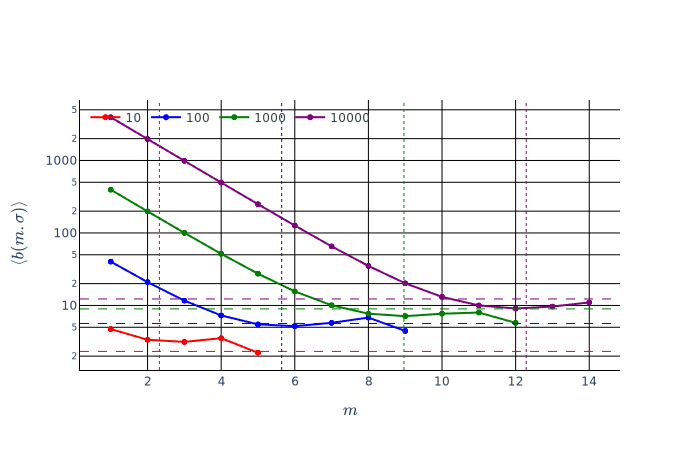

In [5]:
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode(connected=False)
palette=('black','red','blue','green','purple','orange',
         'magenta','cyan','yellow','brown','violet','turquoise')
from myutils import add_line 

layout = go.Layout(
    title="",
    xaxis={
        "title": "$m$",
        "type" : "linear",
        "showline": True, 
        "linewidth" : 1, 
        "linecolor" : 'black',
        "gridcolor" : 'black'
    },
    yaxis={
        "title": "$\langle b(m. \sigma) \\rangle$",
        "type" : "log",
        "showline": True, 
        "linewidth" : 1, 
        "linecolor" : 'black',
        "gridcolor" : 'black'
    },
    legend={
        'yanchor' : "top",
        'y': 0.99,
        'xanchor' : "left",
        'x' : 0.01,
        'orientation' : "h",
    },
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

trace=[]
sigmas = [int(x) for x in np.logspace(1,4,4)]
for i, sigma in enumerate(sigmas):
    bs=[b(m, sigma) for m in ms]
    trace.append(go.Scattergl(x=ms, y=bs, name=sigma, line_color=palette[i+1]))
    
fig = go.Figure(data=trace, layout=layout)
for i, sigma in enumerate(sigmas):
    add_line(fig, np.log2(sigma/2), "", vert=True, log=False, color=palette[i+1], width=1, dash='dot')
    add_line(fig, np.log2(sigma/2), "", vert=False, log=True, color=palette[i+1], width=1, dash='dash')

#offline.iplot(fig)
fig.show('svg')
fig.write_image("f3-41.pdf")

From the excersise above, we estimate that the best $m_{\mathrm{opt}}$ is given by
\begin{equation}
\sim \log_2{\frac{\sigma}{2}}
\end{equation}
as dotted vertical lines, and the best $\langle b(m, \sigma) \rangle$ value is by
\begin{equation}
\sim \log_2{\frac{\sigma}{2}}
\end{equation}
as dashed horizontal lines.